## 简答题

1. Glorot初始化和He初始化为了解决什么问题
2. 是否可以将所有权重初始化为相同的值（只要该值是使用He初始化随机选择的）
3. 将偏置项初始化为0可以吗
4. 总结下讨论过的激活函数，并讲述在什么情况下使用它们
5. 如果在使用SGD优化器时将momentum超参数设置得太接近1（例如0.99999)会发生什么情况
6. 列举三种能产生稀疏模型得方法
7. dropout会减慢训练速度吗？它会减慢推理（即对新实例进行预测）速度吗？MC dropout呢？

In [ ]:
# 1：两者均为权重初始化方法，核心是解决深层神经网络中的梯度消失或梯度爆炸问题。
# 2：不可以
# 3：可以，且通常是推荐做法。
# 偏置项的作用是调整神经元的输出偏移，其不涉及 “对称性问题”：即使初始为 0，在训练中，不同神经元会因输入数据和权重的差异，逐渐学习到不同的偏置值。
# 4：Sigmoid	输出∈(0,1)，可表示概率	二分类问题的输出层（如逻辑回归）
# Tanh	输出∈(-1,1)，零中心对称	隐藏层（性能略优于 sigmoid，但仍有梯度消失）
# ReLU	负输入输出 0，正输入线性传递，计算快	隐藏层（深度学习中最常用，如 CNN、Transformer）
# Leaky ReLU	负输入保留小斜率（如 0.01），缓解 “死亡 ReLU”	隐藏层（解决 ReLU 负输入神经元永久失活问题）
# ELU（指数线性单元）	负输入用指数函数平滑，更鲁棒	隐藏层（可能比 Leaky ReLU 有更好的泛化能力）
# Swish	自门控激活（x・sigmoid (βx)），平滑非线性	隐藏层（在深层网络中性能常优于 ReLU）
# Softmax	输出∈[0,1] 且和为 1，表示类别概率分布	多分类问题的输出层
# 5：若γ太接近 1：动量项v_t会累积过大，导致参数更新的 “惯性” 过强，难以停下。模型可能在最优点附近剧烈震荡，甚至发散（冲过最优区域），无法稳定收敛。过接近 1 会破坏收敛的稳定性。
# 6：l1正则化，dropout,稀疏自编码器
# 7:训练速度：Dropout 会减慢训练速度。训练时需随机失活神经元并缩放输出，且为达到同等性能需要更多迭代（因每次训练相当于 “采样” 子网络），总体训练时间增加。
# 推理速度：不影响。推理时不使用 Dropout（所有神经元激活），无需随机操作，速度与无 Dropout 的网络相同。
# MC Dropout：推理时仍启用 Dropout，通过多次前向传播（采样不同子网络）取预测平均，提升鲁棒性。但会显著减慢推理速度（需多次计算）。

## 编程题

在CIFAR10图像数据集上练习训练深度神经网络：

CIFAR-10数据集，又称加拿大高等研究院数据集（Canadian Institute for Advanced Research）是一个常用于训练机器学习和计算机视觉算法的图像集合。它是最广泛使用的机器学习研究数据集之一。

CIFAR-10数据集包含60,000张32×32像素的彩色图像，分为10个不同的类别。这10个类别分别是飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车，每个类别有6,000张图片。

飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车 对应的分类编码是0，1，2，3，4，5，6，7，8，9


1. 构建一个DNN，使其包含20个隐藏层，每个隐藏层包含100个神经元。使用He初始化和Swish激活函数。
2. 使用Nadam优化和早停技术，在CIFAR10数据集上训练网络。可以使用tf.keras.datasets.cifar10.load_data()加载数据。该数据集由10个类别的60000幅32×32像素的彩色图像（用于训练的50000个，用于测试的10000个）组成，因此需要一个具有10个神经元的softmax输出层。记住，每次更改模型的架构或超参数时，都要找寻正确的学习率。
3. 尝试添加批量归一化并比较学习曲线：收敛速度是否比以前快？会产生更好的模型吗？它如何影响训练速度？
4. 尝试用SELU替换批量归一化，并进行必要的调整以确保网络是自归一化的（即归一化输入特征，使用LeCun正态初始化，确保DNN仅仅包含一系列的密集层等）
5. 尝试使用Alpha dropout正则化模型。然后，在不重新训练模型的情况下，看看是否可以使用MC dropout获得更好的精度。
6. 使用1周期调度来重新训练模型，看看它是否可以提高训练速度和模型精度。

===== 实验1：基础模型 =====
Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2498 - loss: 2.0116 - val_accuracy: 0.3260 - val_loss: 1.8173
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3477 - loss: 1.7810 - val_accuracy: 0.3672 - val_loss: 1.7621
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3919 - loss: 1.6786 - val_accuracy: 0.4096 - val_loss: 1.6386
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4226 - loss: 1.6018 - val_accuracy: 0.4294 - val_loss: 1.5910
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4413 - loss: 1.5501 - val_accuracy: 0.4444 - val_loss: 1.5800
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4572 - loss: 1.5078 - val_accuracy: 0.4450 - val_loss: 1.5578
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4703 - loss: 1.4707 - val_accuracy: 0.4224 - val_loss: 1.6216
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4848 - 

C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 30784 (\N{CJK UNIFIED IDEOGRAPH-7840}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a\AppData\Local\Temp\ipykernel_15128\2846421802.py:192: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEO

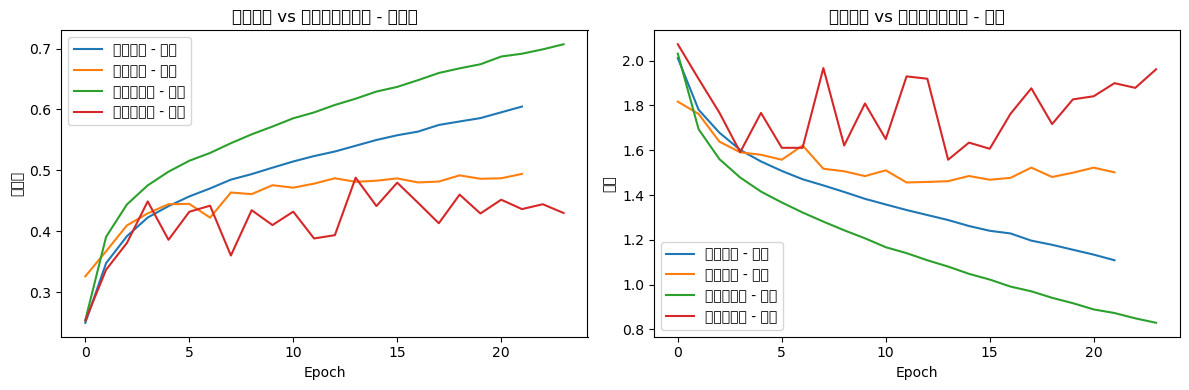


===== 实验3：带SELU的自归一化模型 =====
Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3348 - loss: 1.8703 - val_accuracy: 0.3780 - val_loss: 1.7667
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4124 - loss: 1.6571 - val_accuracy: 0.4238 - val_loss: 1.6061
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4512 - loss: 1.5589 - val_accuracy: 0.4456 - val_loss: 1.5672
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4743 - loss: 1.4864 - val_accuracy: 0.4732 - val_loss: 1.4971
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4956 - loss: 1.4310 - val_accuracy: 0.4718 - val_loss: 1.4990
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5141 - loss: 1.3840 - val_accuracy: 0.4888 - val_loss: 1.4639
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5320 - loss: 1.3427 - val_accuracy: 0.5068 - val_loss: 1.4202
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0

UnboundLocalError: cannot access local variable 'time' where it is not associated with a value

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import time
# 加载并预处理数据
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 数据归一化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 展平图像（对于DNN）
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)
# 标签独热编码
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# 类别名称
class_names = ['飞机', '汽车', '鸟类', '猫', '鹿', '狗', '青蛙', '马', '船', '卡车']
# 1. 构建基础模型：20个隐藏层，每个100个神经元，He初始化，Swish激活
def build_basic_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    # 20个隐藏层
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='he_normal'))
        model.add(layers.Activation(tf.nn.swish))
    # 输出层
    model.add(layers.Dense(num_classes, activation='softmax'))
    # 编译模型，使用Nadam优化器
    optimizer = optimizers.Nadam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# 2. 构建带批量归一化的模型
def build_batchnorm_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    # 20个隐藏层，每个带批量归一化
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='he_normal'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation(tf.nn.swish))
    # 输出层
    model.add(layers.Dense(num_classes, activation='softmax'))
    # 编译模型
    optimizer = optimizers.Nadam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# 3. 构建带SELU的自归一化模型
def build_selu_model(input_shape, num_classes):
    # 对于自归一化网络，需要归一化输入
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.BatchNormalization())  # 归一化输入
    # 20个隐藏层，使用SELU和LeCun初始化
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='lecun_normal'))
        model.add(layers.Activation(tf.nn.selu))
    # 输出层
    model.add(layers.Dense(num_classes, activation='softmax'))
    # 编译模型
    optimizer = optimizers.Nadam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# 4. 构建带Alpha Dropout的模型
def build_alpha_dropout_model(input_shape, num_classes, dropout_rate=0.1):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    # 20个隐藏层，带Alpha Dropout
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='he_normal'))
        model.add(layers.Activation(tf.nn.swish))
        model.add(layers.AlphaDropout(dropout_rate))
    # 输出层
    model.add(layers.Dense(num_classes, activation='softmax'))
    # 编译模型
    optimizer = optimizers.Nadam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# 训练模型并返回历史记录和训练时间
def train_model(model, x_train, y_train, x_test, y_test, epochs=100, batch_size=128):
    # 早停回调
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # 记录训练时间
    start_time = time.time()
    # 训练模型
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[early_stopping],
                        verbose=1)
    # 计算训练时间
    training_time = time.time() - start_time
    # 在测试集上评估
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"测试集准确率: {test_acc:.4f}")
    return history, training_time, test_acc
# 实现1周期学习率调度
def one_cycle_scheduler(epoch, lr):
    max_lr = 0.01
    base_lr = 0.0001
    epochs = 50
    # 前一半周期：线性增加到最大学习率
    if epoch < epochs // 2:
        return base_lr + (max_lr - base_lr) * (2 * epoch) / epochs
    # 后一半周期：线性减小到接近 baseline
    else:
        return max_lr - (max_lr - base_lr) * (2 * (epoch - epochs // 2)) / epochs
# 使用MC Dropout进行预测
def mc_dropout_predict(model, x, n_samples=10):
    # 保存原始训练模式
    original_trainable = model.trainable
    model.trainable = True
    # 多次前向传播
    predictions = [model(x, training=True) for _ in range(n_samples)]
    # 恢复原始模式
    model.trainable = original_trainable
    # 计算平均预测
    return tf.reduce_mean(predictions, axis=0)
# 评估MC Dropout的准确率
def evaluate_mc_dropout(model, x_test, y_test, n_samples=10):
    y_pred_probs = mc_dropout_predict(model, x_test, n_samples)
    y_pred = tf.argmax(y_pred_probs, axis=1)
    y_true = tf.argmax(y_test, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_true), tf.float32))
    return accuracy.numpy()
# 绘制学习曲线
def plot_learning_curves(histories, labels, title):
    plt.figure(figsize=(12, 4))
    # 准确率曲线
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - 训练')
        plt.plot(history.history['val_accuracy'], label=f'{label} - 验证')
    plt.title(f'{title} - 准确率')
    plt.xlabel('Epoch')
    plt.ylabel('准确率')
    plt.legend()
    # 损失曲线
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} - 训练')
        plt.plot(history.history['val_loss'], label=f'{label} - 验证')
    plt.title(f'{title} - 损失')
    plt.xlabel('Epoch')
    plt.ylabel('损失')
    plt.legend()

    plt.tight_layout()
    plt.show()
# 主函数：运行所有实验
def run_experiments():
    input_shape = (32*32*3,)
    num_classes = 10
    histories = []
    labels = []
    test_accuracies = []
    # 实验1：基础模型
    print("===== 实验1：基础模型 =====")
    basic_model = build_basic_model(input_shape, num_classes)
    basic_history, basic_time, basic_acc = train_model(basic_model, x_train, y_train, x_test, y_test)
    histories.append(basic_history)
    labels.append("基础模型")
    test_accuracies.append(("基础模型", basic_acc, basic_time))
    # 实验2：带批量归一化的模型
    print("\n===== 实验2：带批量归一化的模型 =====")
    bn_model = build_batchnorm_model(input_shape, num_classes)
    bn_history, bn_time, bn_acc = train_model(bn_model, x_train, y_train, x_test, y_test)
    histories.append(bn_history)
    labels.append("批量归一化")
    test_accuracies.append(("批量归一化", bn_acc, bn_time))
    # 绘制前两个模型的对比曲线
    plot_learning_curves(histories[:2], labels[:2], "基础模型 vs 批量归一化模型")
    # 实验3：带SELU的自归一化模型
    print("\n===== 实验3：带SELU的自归一化模型 =====")
    selu_model = build_selu_model(input_shape, num_classes)
    selu_history, selu_time, selu_acc = train_model(selu_model, x_train, y_train, x_test, y_test)
    histories.append(selu_history)
    labels.append("SELU")
    test_accuracies.append(("SELU", selu_acc, selu_time))
    # 实验4：带Alpha Dropout的模型
    print("\n===== 实验4：带Alpha Dropout的模型 =====")
    alpha_dropout_model = build_alpha_dropout_model(input_shape, num_classes)
    ad_history, ad_time, ad_acc = train_model(alpha_dropout_model, x_train, y_train, x_test, y_test)
    histories.append(ad_history)
    labels.append("Alpha Dropout")
    test_accuracies.append(("Alpha Dropout", ad_acc, ad_time))
    # 测试MC Dropout
    print("\n===== 测试MC Dropout =====")
    mc_acc = evaluate_mc_dropout(alpha_dropout_model, x_test, y_test, n_samples=10)
    print(f"MC Dropout 准确率: {mc_acc:.4f}")
    test_accuracies.append(("MC Dropout", mc_acc, 0))  # 不计算额外训练时间
    # 实验5：使用1周期调度的模型
    print("\n===== 实验5：使用1周期调度的模型 =====")
    one_cycle_model = build_batchnorm_model(input_shape, num_classes)  # 基于批量归一化模型
    # 回调函数：早停和学习率调度
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(one_cycle_scheduler)
    # 训练模型
    start_time = time.time()
    oc_history = one_cycle_model.fit(x_train, y_train,
                                     epochs=50,
                                     batch_size=128,
                                     validation_split=0.1,
                                     callbacks=[early_stopping, lr_scheduler],
                                     verbose=1)
    oc_time = time.time() - start_time
    # 在测试集上评估
    oc_loss, oc_acc = one_cycle_model.evaluate(x_test, y_test, verbose=0)
    print(f"1周期调度模型测试集准确率: {oc_acc:.4f}")
    histories.append(oc_history)
    labels.append("1周期调度")
    test_accuracies.append(("1周期调度", oc_acc, oc_time))
    # 绘制所有模型的学习曲线
    plot_learning_curves(histories, labels, "所有模型对比")
    # 打印所有模型的结果对比
    print("\n===== 所有模型结果对比 =====")
    print(f"{'模型':<15} {'准确率':<10} {'训练时间(秒)':<15}")
    print("-" * 40)
    for name, acc, time in test_accuracies:
        print(f"{name:<15} {acc:.4f}     {time:.2f}")
# 运行实验
if __name__ == "__main__":
    run_experiments()

加载数据的代码： tf.keras.datasets.cifar10.load_data()

下载失败的解决方案：
1. 下载文件： cifar-10-python.tar.gz （会把文件发群里）
2. 将文件 cifar-10-python.tar.gz 重命名为 cifar-10-batches-py.tar.gz
3. 并复制到类似 C:\Users\某个用户名或者管理员\.keras\datasets 的路径。将 某个用户名或者管理员 替换为你的用户名。如果是 Linux/Macos 系统，则应为 /home/某个用户名或者管理员/.keras/datasets。

In [4]:
# 加载数据的代码
import tensorflow as tf
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# 查看数据集形状
print("训练集图片形状:", X_train_full.shape) # 应该是 (50000, 32, 32, 3)
print("训练集标签形状:", y_train_full.shape) # 应该是 (50000, 1)

训练集图片形状: (50000, 32, 32, 3)
训练集标签形状: (50000, 1)


In [2]:
# 按0-9顺序定义类别：飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

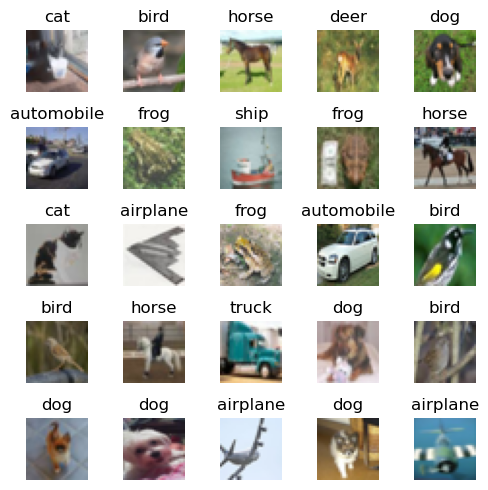

In [3]:
import numpy as np
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

plt.figure(figsize=(5, 5))


random_indices = np.random.choice(len(X_train_full), nrows * ncols, replace=False)  # 无放回随机抽索引

for i, idx in enumerate(random_indices):
    plt.subplot(nrows, ncols, i+1)
    img = X_train_full[idx]
    label = y_train_full[idx, 0]
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

# 调整子图之间的间距，防止标题等重叠
plt.tight_layout()
plt.show()